In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## 1、Data Cleaning

In [17]:
# 读入训练数据
data = pd.read_csv("data/images_random.csv")
# 把之前感知机用的标签是1和-1，改为1和0
data.loc[data.loc[:, "y"] == -1, "y"] = 0


train_x = np.array(data.iloc[:, 0:2])
train_y = np.array(data.iloc[:, -1])


# 标准化
def standardize(x):
    mu = x.mean(axis=0)
    sigma = x.std(axis=0)
    return (x - mu) / sigma

# 增加 x0
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])


train_z = standardize(train_x)
train_X = to_matrix(train_z)


## 2、Model


sigmopid函数
$$
f_{\theta}(\boldsymbol{x})=\frac{1}{1+\exp \left(-\boldsymbol{\theta}^{\mathrm{T}} \boldsymbol{x}\right)}
$$
目标函数
$$
L(\boldsymbol{\theta})=\prod_{i=1}^{n} P\left(y^{(i)}=1 \mid \boldsymbol{x}^{(i)}\right)^{y^{(i)}} P\left(y^{(i)}=0 \mid \boldsymbol{x}^{(i)}\right)^{1-y}{ }^{(i)}
$$
梯度下降
$$
\theta_{j}:=\theta_{j}-\eta \sum_{i=1}^{n}\left(f_{\theta}\left(\boldsymbol{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$


In [20]:
class Logistic_Regression():
    def __init__(self,n) -> None:
        self.theta = np.random.rand(n)
    # sigmoid 函数


    def f(self,X):
        return 1 / (1 + np.exp(-np.dot(X, self.theta)))

    # 分类函数

    def classify(self, X):
        return (self.f(X) >= 0.5).astype(np.int)

    def fit(self,X, y, max_epoch=5000, ETA=1e-3):
        epoch=0
        for _ in range(max_epoch):
            self.theta = self.theta - ETA * np.dot(self.f(X) - y, X)
            # 日志输出
            epoch += 1
            print('Epoch {} : theta = {}'.format(epoch, self.theta))
        return self.theta

Epoch 1 : theta = [0.2098022  0.85926183 0.17563749]
Epoch 2 : theta = [0.20346501 0.90532162 0.02227428]
Epoch 3 : theta = [ 0.1978919   0.94785477 -0.11551004]
Epoch 4 : theta = [ 0.19304955  0.98789861 -0.23959661]
Epoch 5 : theta = [ 0.18887806  1.02620203 -0.35173347]
Epoch 6 : theta = [ 0.18530979  1.06327859 -0.45348248]
Epoch 7 : theta = [ 0.18227796  1.09946563 -0.54620908]
Epoch 8 : theta = [ 0.1797202   1.13497565 -0.63109245]
Epoch 9 : theta = [ 0.17757974  1.16993622 -0.70914428]
Epoch 10 : theta = [ 0.17580569  1.20441902 -0.78122982]
Epoch 11 : theta = [ 0.17435278  1.23846019 -0.84808836]
Epoch 12 : theta = [ 0.17318095  1.27207413 -0.9103519 ]
Epoch 13 : theta = [ 0.17225487  1.3052627  -0.96856155]
Epoch 14 : theta = [ 0.17154349  1.33802112 -1.02318155]
Epoch 15 : theta = [ 0.1710195   1.37034179 -1.0746113 ]
Epoch 16 : theta = [ 0.17065897  1.40221657 -1.12319534]
Epoch 17 : theta = [ 0.17044089  1.43363814 -1.16923183]
Epoch 18 : theta = [ 0.17034684  1.4646007  -1

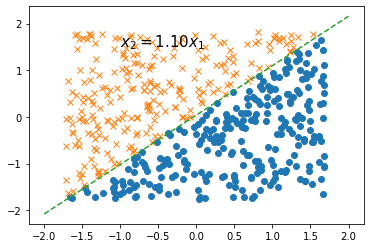

In [22]:
if __name__=='main':
    model = Logistic_Regression(n=3)
    theta = model.fit(train_X, train_y, max_epoch=5000, ETA=1e-3)
        # 绘图确认
    x0 = np.linspace(-2, 2, 100)
    plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
    plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
    plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
    plt.text(-1, 1.5,
            f"$x_2={-(theta[0] + theta[1]) / theta[2]:.2f}x_1$", fontsize=15)
    plt.show()
